In [1]:
import re
import numpy as np
import matplotlib.pyplot as plt

In [45]:
sentences = """We are about to study the idea of a computational process.
Computational processes are abstract beings that inhabit computers.
As they evolve, processes manipulate other abstract things called data.
The evolution of a process is directed by a pattern of rules
called a program. People create programs to direct processes. In effect,
we conjure the spirits of the computer with our spells."""

### clean data

In [46]:
words = re.sub('[^A-Za-z0-9 ]', ' ', sentences).lower().split()
words

['we',
 'are',
 'about',
 'to',
 'study',
 'the',
 'idea',
 'of',
 'a',
 'computational',
 'process',
 'computational',
 'processes',
 'are',
 'abstract',
 'beings',
 'that',
 'inhabit',
 'computers',
 'as',
 'they',
 'evolve',
 'processes',
 'manipulate',
 'other',
 'abstract',
 'things',
 'called',
 'data',
 'the',
 'evolution',
 'of',
 'a',
 'process',
 'is',
 'directed',
 'by',
 'a',
 'pattern',
 'of',
 'rules',
 'called',
 'a',
 'program',
 'people',
 'create',
 'programs',
 'to',
 'direct',
 'processes',
 'in',
 'effect',
 'we',
 'conjure',
 'the',
 'spirits',
 'of',
 'the',
 'computer',
 'with',
 'our',
 'spells']

In [47]:
vocab = set(words)
vocab

{'a',
 'about',
 'abstract',
 'are',
 'as',
 'beings',
 'by',
 'called',
 'computational',
 'computer',
 'computers',
 'conjure',
 'create',
 'data',
 'direct',
 'directed',
 'effect',
 'evolution',
 'evolve',
 'idea',
 'in',
 'inhabit',
 'is',
 'manipulate',
 'of',
 'other',
 'our',
 'pattern',
 'people',
 'process',
 'processes',
 'program',
 'programs',
 'rules',
 'spells',
 'spirits',
 'study',
 'that',
 'the',
 'they',
 'things',
 'to',
 'we',
 'with'}

In [62]:
vocab_size = len(vocab)
embed_dim = 10
context_size = 2

### Dictionaries for vocab

In [75]:
word_to_ix = {word: index for index, word in enumerate(vocab)}
word_to_ix

{'are': 0,
 'process': 1,
 'with': 2,
 'pattern': 3,
 'beings': 4,
 'effect': 5,
 'inhabit': 6,
 'that': 7,
 'is': 8,
 'in': 9,
 'other': 10,
 'by': 11,
 'program': 12,
 'the': 13,
 'manipulate': 14,
 'directed': 15,
 'study': 16,
 'abstract': 17,
 'create': 18,
 'called': 19,
 'direct': 20,
 'spirits': 21,
 'a': 22,
 'computational': 23,
 'as': 24,
 'evolve': 25,
 'data': 26,
 'about': 27,
 'they': 28,
 'computer': 29,
 'conjure': 30,
 'things': 31,
 'rules': 32,
 'programs': 33,
 'processes': 34,
 'our': 35,
 'to': 36,
 'evolution': 37,
 'computers': 38,
 'spells': 39,
 'of': 40,
 'people': 41,
 'we': 42,
 'idea': 43}

In [76]:
ix_to_word = {index: word for index, word in enumerate(vocab)}
ix_to_word

{0: 'are',
 1: 'process',
 2: 'with',
 3: 'pattern',
 4: 'beings',
 5: 'effect',
 6: 'inhabit',
 7: 'that',
 8: 'is',
 9: 'in',
 10: 'other',
 11: 'by',
 12: 'program',
 13: 'the',
 14: 'manipulate',
 15: 'directed',
 16: 'study',
 17: 'abstract',
 18: 'create',
 19: 'called',
 20: 'direct',
 21: 'spirits',
 22: 'a',
 23: 'computational',
 24: 'as',
 25: 'evolve',
 26: 'data',
 27: 'about',
 28: 'they',
 29: 'computer',
 30: 'conjure',
 31: 'things',
 32: 'rules',
 33: 'programs',
 34: 'processes',
 35: 'our',
 36: 'to',
 37: 'evolution',
 38: 'computers',
 39: 'spells',
 40: 'of',
 41: 'people',
 42: 'we',
 43: 'idea'}

### Data bags

In [56]:
data = []

for i in range(2, len(words)-2):
    data.append(([words[i-2], words[i-1], words[i+1], words[i+2]], words[i]))

data

[(['we', 'are', 'to', 'study'], 'about'),
 (['are', 'about', 'study', 'the'], 'to'),
 (['about', 'to', 'the', 'idea'], 'study'),
 (['to', 'study', 'idea', 'of'], 'the'),
 (['study', 'the', 'of', 'a'], 'idea'),
 (['the', 'idea', 'a', 'computational'], 'of'),
 (['idea', 'of', 'computational', 'process'], 'a'),
 (['of', 'a', 'process', 'computational'], 'computational'),
 (['a', 'computational', 'computational', 'processes'], 'process'),
 (['computational', 'process', 'processes', 'are'], 'computational'),
 (['process', 'computational', 'are', 'abstract'], 'processes'),
 (['computational', 'processes', 'abstract', 'beings'], 'are'),
 (['processes', 'are', 'beings', 'that'], 'abstract'),
 (['are', 'abstract', 'that', 'inhabit'], 'beings'),
 (['abstract', 'beings', 'inhabit', 'computers'], 'that'),
 (['beings', 'that', 'computers', 'as'], 'inhabit'),
 (['that', 'inhabit', 'as', 'they'], 'computers'),
 (['inhabit', 'computers', 'they', 'evolve'], 'as'),
 (['computers', 'as', 'evolve', 'proce

#### Model components

In [63]:
embeddings = np.random.random_sample((vocab_size, embed_dim))
embeddings

array([[4.41551018e-01, 8.64850150e-01, 3.96852603e-01, 9.80832068e-01,
        4.52968837e-01, 9.21504675e-01, 5.53552036e-01, 8.32424164e-01,
        4.09255838e-01, 5.88644272e-01],
       [5.94979092e-01, 8.73318791e-01, 4.61861240e-01, 6.77771037e-01,
        7.19951958e-01, 8.63874628e-01, 4.21576958e-01, 6.28124111e-01,
        1.87590148e-01, 1.61080488e-02],
       [4.55639280e-01, 5.08659519e-01, 2.27463757e-01, 4.68656616e-01,
        8.88832382e-01, 7.64876222e-01, 5.82246669e-01, 5.84189361e-02,
        2.12433519e-01, 6.70679800e-02],
       [7.38707778e-01, 5.88416861e-01, 8.13510455e-02, 9.14168186e-01,
        1.70704012e-01, 6.10995259e-01, 1.76431659e-01, 5.45166179e-01,
        5.83904255e-02, 6.94940273e-01],
       [6.52652230e-01, 8.58501225e-01, 9.58362602e-01, 9.72980298e-01,
        6.79718375e-01, 7.79182860e-01, 5.62223356e-01, 6.37914190e-01,
        1.24075705e-01, 5.28823264e-01],
       [5.45826797e-01, 9.60474991e-01, 3.98441556e-01, 1.75781337e-01,
   

In [66]:
def linear_model(m, theta):
    return m.dot(theta)

In [67]:
def log_softmax(x):
    e_x = np.exp(x - np.max(x))
    return np.log(e_x / e_x.sum())

In [68]:
def NLLLoss(logs, targets):
    out = logs[range(len(targets)), targets]
    return -out.sum()/len(out)

In [69]:
def log_softmax_crossentropy_with_logits(logits,target):
    out = np.zeros_like(logits)
    out[np.arange(len(logits)),target] = 1
    
    softmax = np.exp(logits) / np.exp(logits).sum(axis=-1,keepdims=True)
    
    return (- out + softmax) / logits.shape[0]

In [70]:
def forward(context_idxs, theta):
    m = embeddings[context_idxs].reshape(1, -1)
    n = linear_model(m, theta)
    o = log_softmax(n)
    return m, n, o

In [71]:
def backward(preds, theta, target_idxs):
    m, n, o = preds
    dlog = log_softmax_crossentropy_with_logits(n, target_idxs)
    dw = m.T.dot(dlog)
    return dw

In [72]:
def optimize(theta, grad, lr=0.03):
    theta -= grad * lr
    return theta

### Training function

In [73]:
theta = np.random.uniform(-1, 1, (2 * context_size * embed_dim, vocab_size))

In [77]:
epoch_losses = {}

for epoch in range(80):

    losses =  []

    for context, target in data:
        context_idxs = np.array([word_to_ix[w] for w in context])
        preds = forward(context_idxs, theta)

        target_idxs = np.array([word_to_ix[target]])
        loss = NLLLoss(preds[-1], target_idxs)

        losses.append(loss)

        grad = backward(preds, theta, target_idxs)
        theta = optimize(theta, grad, lr=0.03)
        
     
    epoch_losses[epoch] = losses

Text(0, 0.5, 'Losses')

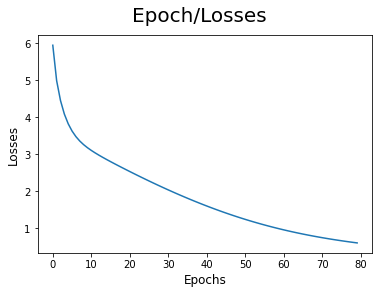

In [78]:
ix = np.arange(0,80)

fig = plt.figure()
fig.suptitle('Epoch/Losses', fontsize=20)
plt.plot(ix,[epoch_losses[i][0] for i in ix])
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Losses', fontsize=12)

In [79]:
def predict(words):
    context_idxs = np.array([word_to_ix[w] for w in words])
    preds = forward(context_idxs, theta)
    word = ix_to_word[np.argmax(preds[-1])]
    
    return word

In [85]:
def accuracy():
    wrong = 0

    for context, target in data:
        if(predict(context) != target):
            wrong += 1
            
    return (1 - (wrong / len(data)))

In [86]:
accuracy()

1.0